# Part 2: Disparity Map Estimation
In this part, we illustrated our working implementation along with the implemented alternatives. Then we performed a search for the optimal window size for both of the image pairs given. A sample run of our estimator takes approximately 6 minutes. Due to this fact, we ran different different experiments in different cells with a progress bar.

## Necessary Imports
The necessary imports for the experiments is given below. The file *disparity_estimator.py* includes our implementation.

In [1]:
import numpy as np
import cv2
import os
from part2.disparity_estimator import *
import matplotlib.pyplot as plt

## Estimating on Grayscale image
As our best configuration, we performed depth estimation using the grayscale image. In this configuration, the disparity value is pixel by pixel but each window impacts on that disparity value as a whole. Since we used grayscale pixels, we were able to apply normalized-correlation based calculations.
### Results on the plastic image
Initially we presented our results on the plastic image, with different selections.
#### Importing the images and forming the estimator
Initially, the procedure of setting the target images and setting up the estimator is given. In the default estimator the following properties are satisfied
- The prediction is based on grayscale values
- Cosine similarity is used for prediction (normalized correlation)
- Disparity values are updated in the size of a window (summation of overlapping windows)

In [2]:
estimator = DisparityMapEstimator()
data_path = os.path.join(os.getcwd(), "homework_dataset/data_disparity_estimation")
right_path = os.path.join(data_path, "plastic/right.png")
left_path = os.path.join(data_path, "plastic/left.png")
estimator.register_images(left_path, right_path)

INFO: Right view image loaded. The shape of the image is (370, 423)
INFO: Left view image loaded. The shape of the image is (370, 423)


### Setting Window size to 5
In our first experiment, we tried out 5x5 windows. The result of this is given in the following cell.

100%|██████████| 366/366 [07:34<00:00,  1.24s/it]


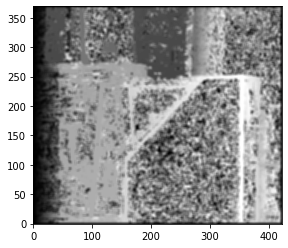

In [3]:
d_map = estimator.get_map(5)
plt.imshow(np.fliplr(d_map) / np.max(d_map), cmap="gray", origin='lower')
plt.show()

### Setting Window size to 7
With window size 5, we observed a lot of noise in this image. This gave us motivation to go further and increment the window size. As the surface that the given object contains is flat, we considered this noise as normal.

100%|██████████| 364/364 [07:30<00:00,  1.24s/it]


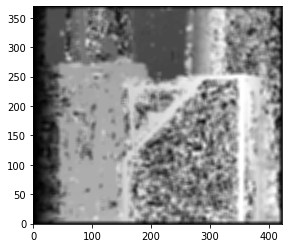

In [4]:
d_map_7 = estimator.get_map(7)
plt.imshow(np.fliplr(d_map_7) / np.max(d_map_7), cmap="gray", origin='lower')
plt.show()

### Setting Window size 11
After incrementing the window size to 11, we observed significant drop in terms of noise together with the amount of details. Even though the output seemed less noise, the shapes observed in the disparity map experienced loss in in terms of structure. Due to that, we set our optimal value for window size as 7.

100%|██████████| 360/360 [07:30<00:00,  1.25s/it]


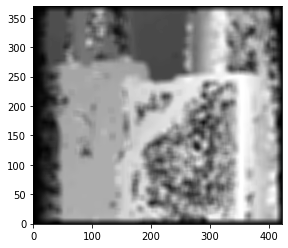

In [5]:
d_map_11 = estimator.get_map(11)
plt.imshow(np.fliplr(d_map_11) / np.max(d_map_11), cmap="gray", origin='lower')
plt.show()

### Optimal Confguration: pixel-wise disparity with window size 7
As a result of our experiments, we saw that pixel-wise calculation gives less blurry results. Following our previous experiments, we reported the configuration where pixel disparity is based on a definite window with window size 7 as the optimal one.

  0%|          | 0/364 [00:00<?, ?it/s]

INFO: Right view image loaded. The shape of the image is (370, 423)
INFO: Left view image loaded. The shape of the image is (370, 423)


100%|██████████| 364/364 [09:00<00:00,  1.48s/it]


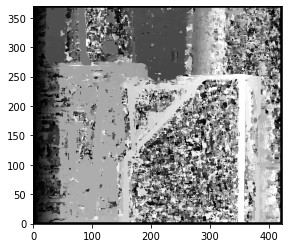

In [6]:
pixel_plastic_estimator = DisparityMapEstimator(depth_mode="pixel")
pixel_plastic_estimator.register_images(left_path, right_path)
pixel_map_7 = pixel_plastic_estimator.get_map(7)
plt.imshow(np.fliplr(pixel_map_7) / np.max(pixel_map_7), cmap="gray", origin='lower')
plt.show()

### Results on the clothing image
Secondly we presented our results on the cloth image, with different selections.
#### Importing the images and forming the estimator
For the estimating and importing procedure, we started with the same assumptions with the previous part. The image import stage is given as follows.

In [7]:
data_path = os.path.join(os.getcwd(), "homework_dataset/data_disparity_estimation")
right_path = os.path.join(data_path, "cloth/right.png")
left_path = os.path.join(data_path, "cloth/left.png")
estimator.register_images(left_path, right_path)

INFO: Right view image loaded. The shape of the image is (370, 417)
INFO: Left view image loaded. The shape of the image is (370, 417)


### Setting window size to 5
Staying consistent with the experiments for the previous target, we stareted the estimation procedure with window size 5. Even though the structure is cleaner compared to plastic context, we oberved some noise in the output. In order to eliminate this noise, we tried out higher window sizes.

100%|██████████| 366/366 [07:39<00:00,  1.26s/it]


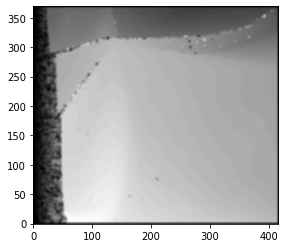

In [8]:
cloth_map_5 = estimator.get_map(5)
plt.imshow(np.fliplr(cloth_map_5) / np.max(cloth_map_5), cmap="gray", origin='lower')
plt.show()

### Setting window size to 7
Just like the previous experiment, we incremented the window size to decrement the amount of noise observed. The observed result is as follows.

100%|██████████| 364/364 [06:58<00:00,  1.15s/it]


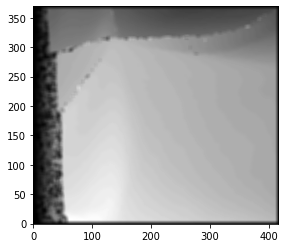

In [9]:
cloth_map_7 = estimator.get_map(7)
plt.imshow(np.fliplr(cloth_map_7) / np.max(cloth_map_7), cmap="gray", origin='lower')
plt.show()

### Setting window size to 11
As our upper limit, we tried our the window value 11. Here, the smooth appearance is obtained with the cost of losing information. To not lose shape based information, we maintained the optimal window size as 7.

100%|██████████| 360/360 [07:18<00:00,  1.22s/it]


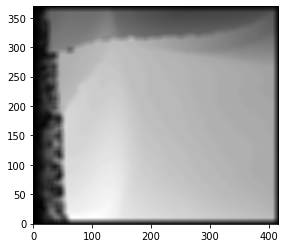

In [10]:
cloth_map_11 = estimator.get_map(11)
plt.imshow(np.fliplr(cloth_map_11) / np.max(cloth_map_11), cmap="gray", origin='lower')
plt.show()

### Optimal Confguration: pixel-wise disparity with window size 7
For our final experiment, we tried out the optimal window size with pixel-wise disparity calculation. This serves as our best result for cloth context. The result is given below.

  0%|          | 0/364 [00:00<?, ?it/s]

INFO: Right view image loaded. The shape of the image is (370, 417)
INFO: Left view image loaded. The shape of the image is (370, 417)


100%|██████████| 364/364 [07:10<00:00,  1.18s/it]


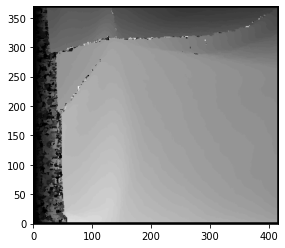

In [11]:
pixel_cloth_estimator = DisparityMapEstimator(depth_mode="pixel")
pixel_cloth_estimator.register_images(left_path, right_path)
pixel_cloth_map_7 = pixel_cloth_estimator.get_map(7)
plt.imshow(np.fliplr(pixel_cloth_map_7) / np.max(pixel_cloth_map_7), cmap="gray", origin='lower')
plt.show()